## LIBRARIES IMPORT

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

## DATA IMPORT

In [5]:
import pandas as pd
df = pd.read_csv("PC-SM.csv")
df.head()

,ID,PS1,PS2,PS3,PS4,PS5,PS6,PS7,PS8,PS9,...,PLT6,PLT7,Gender,Age,MS,RL,PI,Education Level,ED,COO
0,1,4,2,4,4,4,4,4,4,2,...,4,4,2,1,3,1,1,5,5,3
1,2,4,3,3,3,3,3,4,3,2,...,4,4,2,1,1,1,1,5,2,3
2,3,5,4,4,4,3,4,5,3,3,...,4,5,1,2,3,1,6,5,1,3
3,4,5,2,3,3,3,3,4,3,1,...,4,4,1,1,1,1,2,4,5,3
4,5,4,4,4,4,3,3,3,3,3,...,2,2,1,1,1,1,2,5,5,3


## Data Pre-Processing

In [8]:
df2 = df.drop(['ID'], axis=1)

In [10]:
df2['PS'] = df2['PS1'] + df2['PS2']+ df2['PS3']+ df2['PS4'] + df2['PS5'] + df2['PS6'] + df2['PS7'] + df2['PS8'] + df2['PS9']

In [12]:
rating = []
for row in df2['PS']:
    if row<27:
        rating.append('WEAK')
    else:
        rating.append('STRONG')
df2['PS_Level'] = rating

In [14]:
df2['PS_Level'].value_counts()

PS_Level
STRONG    276
WEAK      196
Name: count, dtype: int64

In [16]:
df3 = df2.drop(columns = ['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'PS7', 'PS8', 'PS9', 'PS'],inplace = True)

In [18]:
df2.columns

Index(['SMUT1', 'SMUT2', 'SMUT3', 'SMUT4', 'SMUT5', 'SMUT6', 'SMUT7', 'SMUT8',
       'SMUT9', 'OSC1', 'OSC2', 'OSC3', 'OSC4', 'OSC5', 'OSC6', 'VONP 1',
       'VONP2', 'VONP3', 'VONP4', 'VONP5', 'VONP6', 'VONP7', 'VONP8', 'VOFP1',
       'VOFP2', 'VOFP3', 'VOFP4', 'VOFP5', 'VOFP6', 'VOFP7', 'PLT1', 'PLT2',
       'PLT3', 'PLT4', 'PLT5', 'PLT6', 'PLT7', 'Gender', 'Age', 'MS', 'RL',
       'PI', 'Education Level', 'ED', 'COO', 'PS_Level'],
      dtype='object')

In [20]:
X = df2.drop(columns = ['PS_Level'])
y = df2['PS_Level']

In [22]:
feature_names = X.columns.tolist()
print(feature_names)

['SMUT1', 'SMUT2', 'SMUT3', 'SMUT4', 'SMUT5', 'SMUT6', 'SMUT7', 'SMUT8', 'SMUT9', 'OSC1', 'OSC2', 'OSC3', 'OSC4', 'OSC5', 'OSC6', 'VONP 1', 'VONP2', 'VONP3', 'VONP4', 'VONP5', 'VONP6', 'VONP7', 'VONP8', 'VOFP1', 'VOFP2', 'VOFP3', 'VOFP4', 'VOFP5', 'VOFP6', 'VOFP7', 'PLT1', 'PLT2', 'PLT3', 'PLT4', 'PLT5', 'PLT6', 'PLT7', 'Gender', 'Age', 'MS', 'RL', 'PI', 'Education Level', 'ED', 'COO']


## Train on the UK Data to Test on Malaysia And Pakistan

In [25]:
#Training on the UK data only
X_train = X[df2['COO'] == 1]
y_train = y[df2['COO'] == 1]

#First Test set on Malaysian data only
X_test1 = X[df2['COO'] == 2]
y_test1 = y[df2['COO'] == 2]

#Second Test set on Pakistan data only
X_test2 = X[df2['COO'] == 3]
y_test2 = y[df2['COO'] == 3]

#Verify the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set 1 size : {X_test1.shape[0]}")
print(f"Testing set 2 size : {X_test2.shape[0]}")

Training set size: 160
Testing set 1 size : 159
Testing set 2 size : 153


## FEATURE SELECTION

### Pearson's Correlation

In [29]:
corr = X_train.corr()
corr

,SMUT1,SMUT2,SMUT3,SMUT4,SMUT5,SMUT6,SMUT7,SMUT8,SMUT9,OSC1,...,PLT6,PLT7,Gender,Age,MS,RL,PI,Education Level,ED,COO
SMUT1,1.000000,0.570522,0.283886,0.493323,0.414113,0.628014,0.613581,0.512689,0.468286,0.251295,...,0.130357,0.101880,-0.060818,0.235140,0.125006,0.048392,0.031701,0.214998,-0.076592,NaN
SMUT2,0.570522,1.000000,0.511700,0.752441,0.531886,0.719524,0.704982,0.390196,0.492612,0.289182,...,-0.047835,-0.031725,-0.034507,0.127382,0.052808,0.049682,0.061069,0.151763,-0.134449,NaN
SMUT3,0.283886,0.511700,1.000000,0.549835,0.485863,0.432527,0.451365,0.316287,0.392693,0.493425,...,0.077680,0.146778,-0.079236,0.016544,-0.035684,0.091611,0.063366,0.136602,-0.016424,NaN
SMUT4,0.493323,0.752441,0.549835,1.000000,0.519885,0.735442,0.727296,0.350330,0.416842,0.291831,...,-0.014550,0.024976,-0.021717,0.122609,0.015027,0.102999,-0.035200,0.098437,-0.067474,NaN
SMUT5,0.414113,0.531886,0.485863,0.519885,1.000000,0.535262,0.439759,0.289081,0.264697,0.304640,...,0.171065,0.111502,-0.085621,0.020683,-0.028985,0.177856,-0.072262,0.090964,-0.131248,NaN
SMUT6,0.628014,0.719524,0.432527,0.735442,0.535262,1.000000,0.870752,0.435374,0.576095,0.225940,...,-0.024895,0.000700,-0.042815,0.135614,0.063347,0.043388,0.030534,0.153258,-0.057642,NaN
SMUT7,0.613581,0.704982,0.451365,0.727296,0.439759,0.870752,1.000000,0.433211,0.665789,0.233991,...,-0.111071,-0.043205,-0.035506,0.167047,0.042097,0.039073,0.066149,0.110697,-0.059503,NaN
SMUT8,0.512689,0.390196,0.316287,0.350330,0.289081,0.435374,0.433211,1.000000,0.680482,0.273904,...,-0.071620,0.034872,0.033084,0.027963,0.008856,-0.135383,0.188524,0.129252,0.034753,NaN
SMUT9,0.468286,0.492612,0.392693,0.416842,0.264697,0.576095,0.665789,0.680482,1.000000,0.261602,...,-0.130757,-0.011804,-0.043694,0.131471,0.093639,-0.111712,0.125342,0.193936,-0.027066,NaN
OSC1,0.251295,0.289182,0.493425,0.291831,0.304640,0.225940,0.233991,0.273904,0.261602,1.000000,...,0.051632,0.046975,-0.090930,0.032709,0.100634,0.068855,0.094585,0.067087,-0.086299,NaN


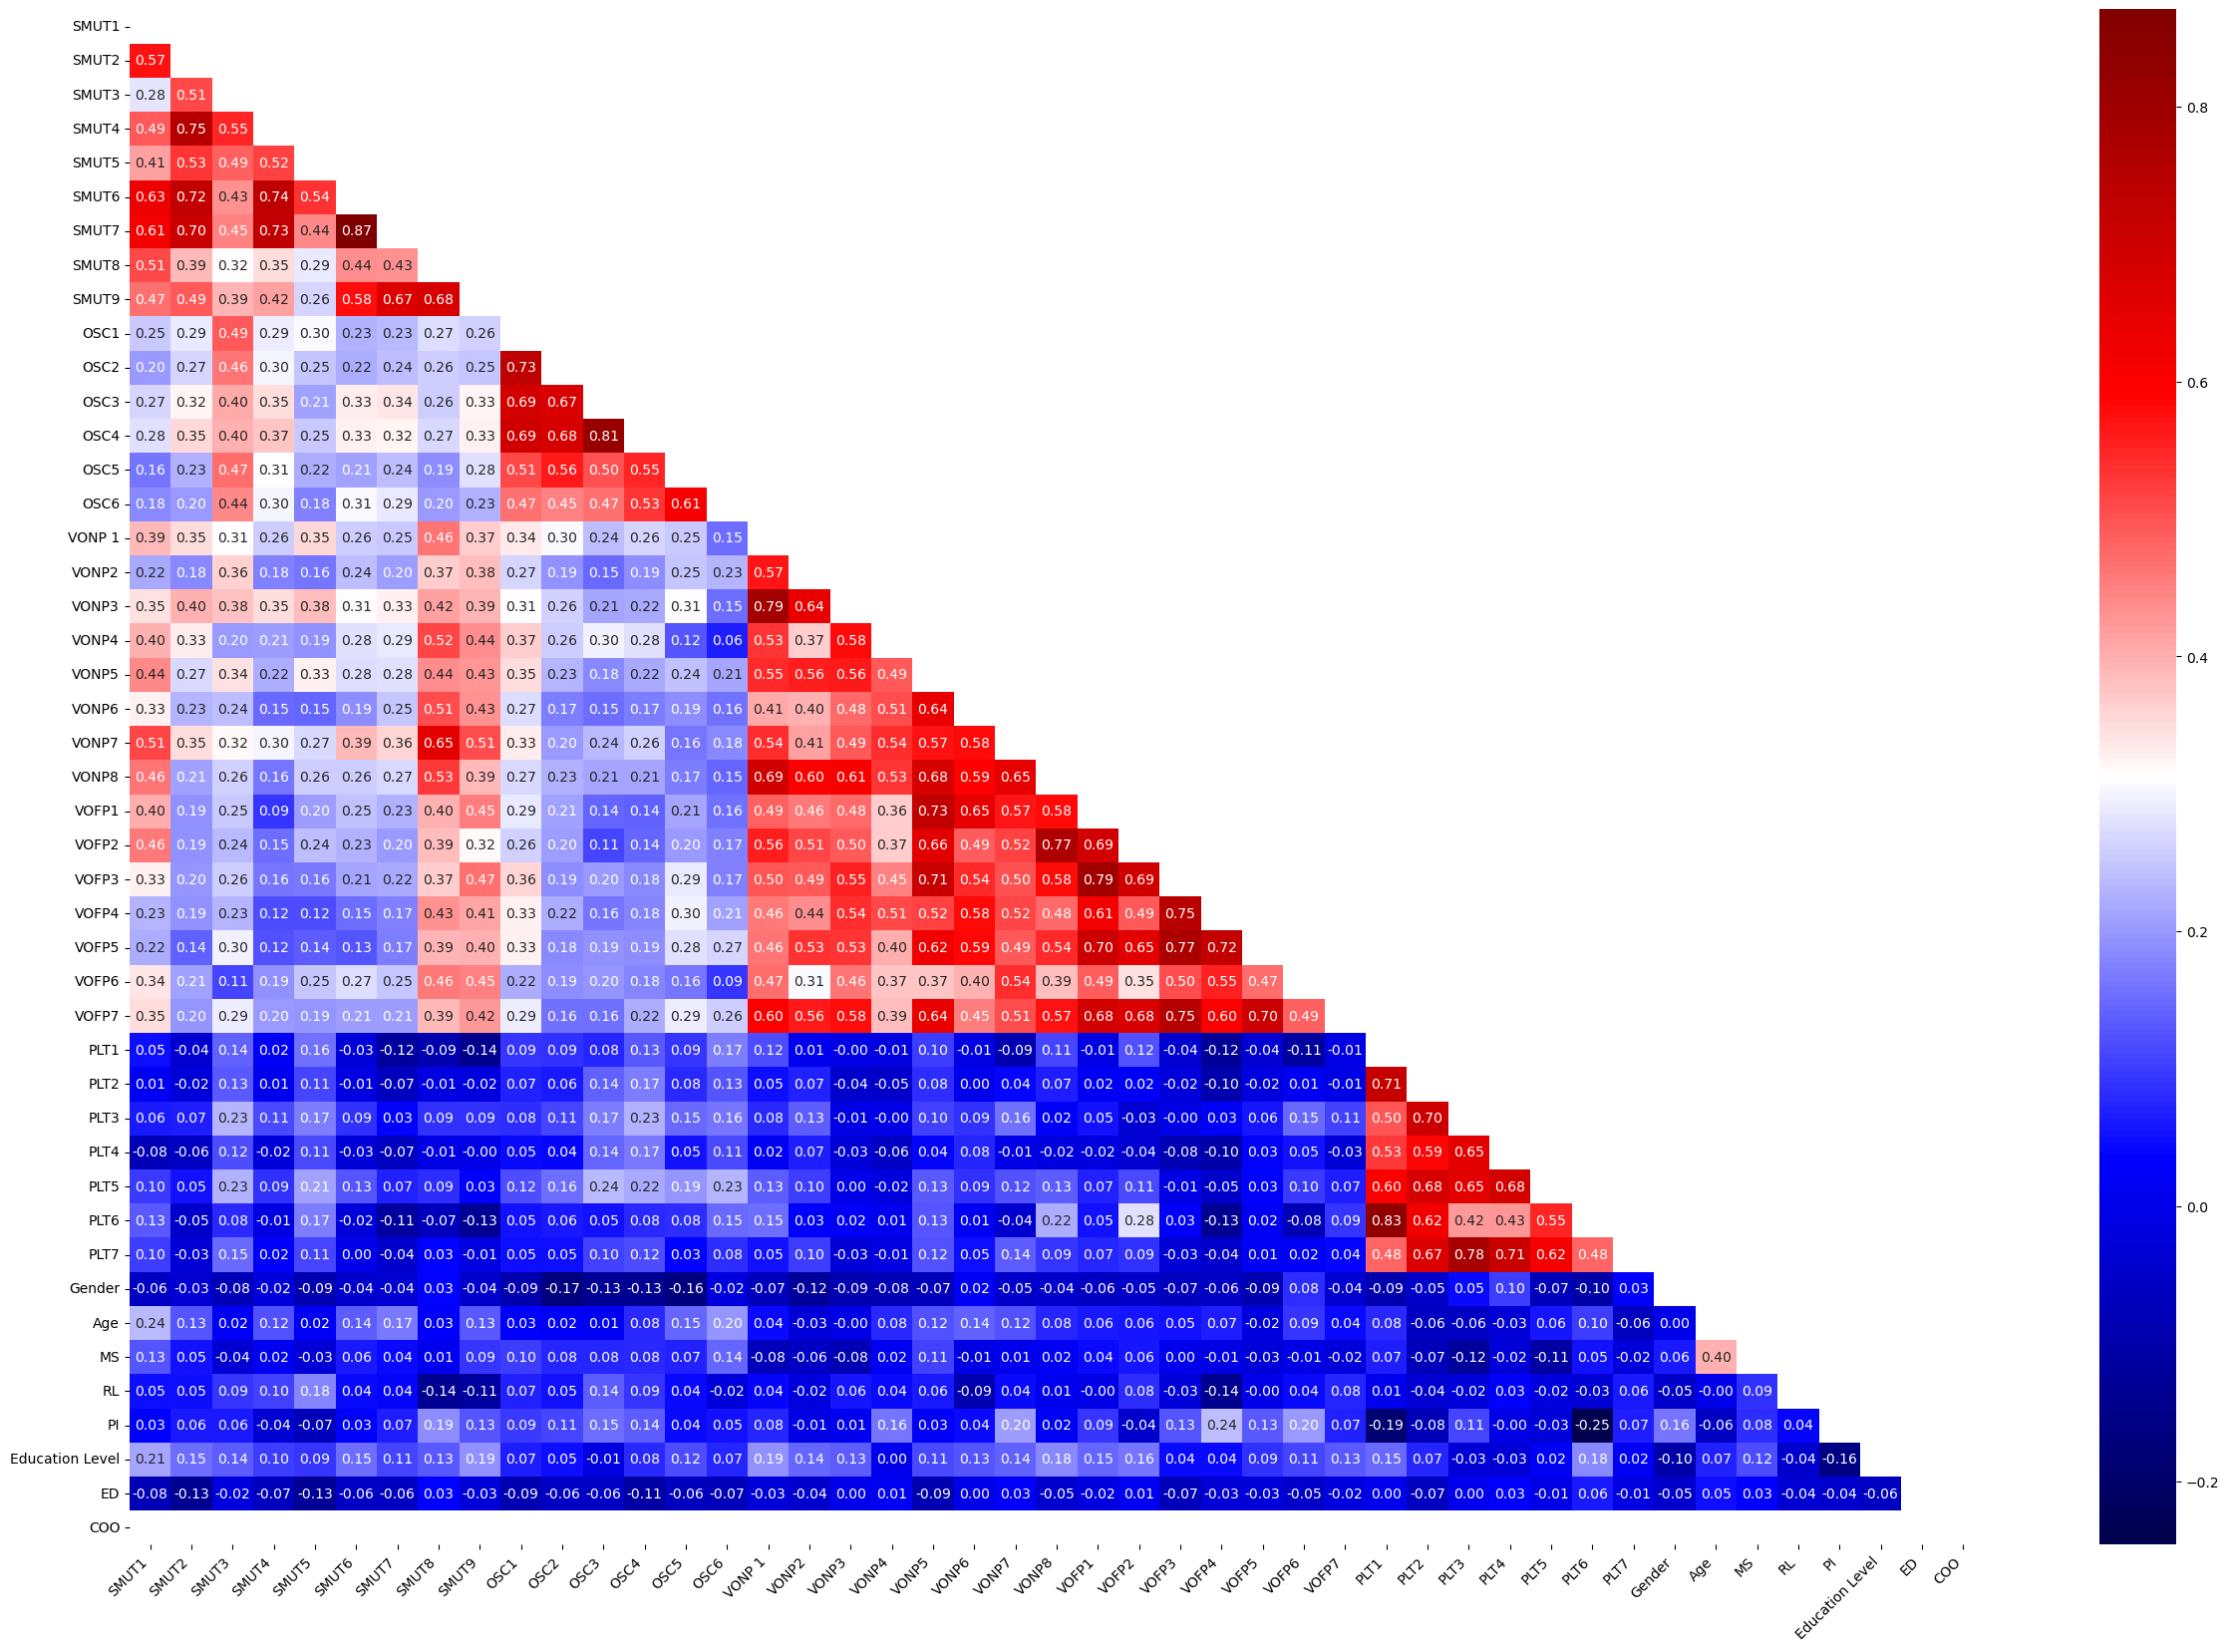

<Figure size 640x480 with 0 Axes>

In [31]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(30, 20))
sns.heatmap(
    corr, 
    mask=mask,  
    annot=True, 
    fmt=".2f", 
    cmap="seismic", 
    annot_kws={"size": 10}
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
correlation_matrix = X_train.corr()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
threshold = 0.85
corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

print(f'Number of correlated features: {len(corr_features)}')
print(corr_features)

Number of correlated features: 1
['SMUT7']


In [35]:
print(f"Number of features in X_train before dropping: {X_train.shape[1]}")
print(f"Number of features in X_test1 before dropping: {X_test1.shape[1]}")
print(f"Number of features in X_test2 before dropping: {X_test2.shape[1]}")

#Drop the correlated features from the dataset
X_train = X_train.drop(columns=corr_features, errors='ignore')
X_test1 = X_test1.drop(columns=corr_features, errors='ignore')
X_test2 = X_test2.drop(columns=corr_features, errors='ignore')

print(f"Number of features dropped: {len(corr_features)}")
print(f"Remaining features in X_train: {X_train.shape[1]}")
print(f"Remaining features in X_test1: {X_test1.shape[1]}")
print(f"Remaining features in X_test2: {X_test2.shape[1]}")

Number of features in X_train before dropping: 45
Number of features in X_test1 before dropping: 45
Number of features in X_test2 before dropping: 45
Number of features dropped: 1
Remaining features in X_train: 44
Remaining features in X_test1: 44
Remaining features in X_test2: 44


### Using Information Gain

In [38]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train, random_state = 29)
mutual_info

array([0.03133172, 0.00756346, 0.04397873, 0.04836941, 0.        ,
       0.05320626, 0.00888063, 0.07729526, 0.01880634, 0.05656693,
       0.03542117, 0.        , 0.03774392, 0.00052469, 0.03040035,
       0.02704357, 0.04183626, 0.07946105, 0.06542551, 0.07199056,
       0.07061416, 0.09837796, 0.10111036, 0.07286888, 0.09291705,
       0.05262389, 0.08794921, 0.08866335, 0.07293544, 0.01963115,
       0.        , 0.00345854, 0.        , 0.        , 0.        ,
       0.02530029, 0.        , 0.        , 0.08938469, 0.04854967,
       0.        , 0.02603437, 0.        , 0.03626615])

In [40]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

VOFP1              0.101110
VONP8              0.098378
VOFP3              0.092917
MS                 0.089385
VOFP6              0.088663
VOFP5              0.087949
VONP4              0.079461
SMUT9              0.077295
VOFP7              0.072935
VOFP2              0.072869
VONP6              0.071991
VONP7              0.070614
VONP5              0.065426
OSC2               0.056567
SMUT6              0.053206
VOFP4              0.052624
RL                 0.048550
SMUT4              0.048369
SMUT3              0.043979
VONP3              0.041836
OSC5               0.037744
COO                0.036266
OSC3               0.035421
SMUT1              0.031332
VONP 1             0.030400
VONP2              0.027044
Education Level    0.026034
PLT7               0.025300
PLT1               0.019631
OSC1               0.018806
SMUT8              0.008881
SMUT2              0.007563
PLT3               0.003459
OSC6               0.000525
PLT4               0.000000
PLT6               0

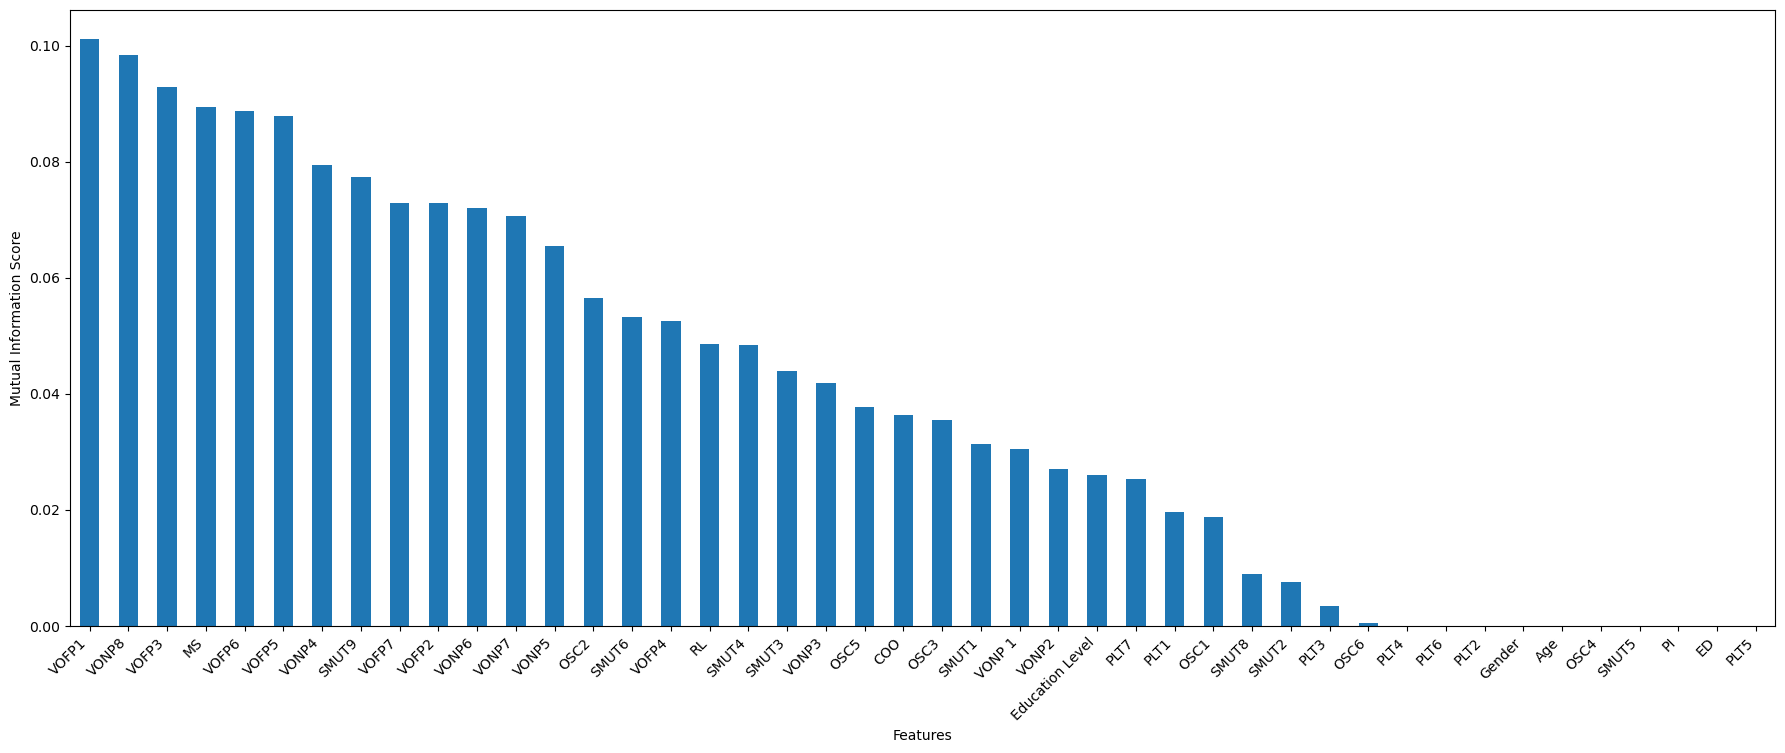

In [42]:
plt.figure(figsize = (22, 8))
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
mutual_info.sort_values(ascending = False).plot.bar()
plt.xticks(rotation=45, ha='right');

In [44]:
threshold = 0.030
features_to_drop = mutual_info[mutual_info < threshold].index

#Drop these features from the dataset
X_train = X_train.drop(columns=features_to_drop)
X_test1 = X_test1.drop(columns=features_to_drop)
X_test2 = X_test2.drop(columns=features_to_drop)

print(f"Features dropped (MI < {threshold}): {list(features_to_drop)}")
print("Remaining features after dropping:")
print(X_train.columns)

Features dropped (MI < 0.03): ['SMUT2', 'SMUT5', 'SMUT8', 'OSC1', 'OSC4', 'OSC6', 'VONP2', 'PLT1', 'PLT2', 'PLT3', 'PLT4', 'PLT5', 'PLT6', 'PLT7', 'Gender', 'Age', 'PI', 'Education Level', 'ED']
Remaining features after dropping:
Index(['SMUT1', 'SMUT3', 'SMUT4', 'SMUT6', 'SMUT9', 'OSC2', 'OSC3', 'OSC5',
       'VONP 1', 'VONP3', 'VONP4', 'VONP5', 'VONP6', 'VONP7', 'VONP8', 'VOFP1',
       'VOFP2', 'VOFP3', 'VOFP4', 'VOFP5', 'VOFP6', 'VOFP7', 'MS', 'RL',
       'COO'],
      dtype='object')


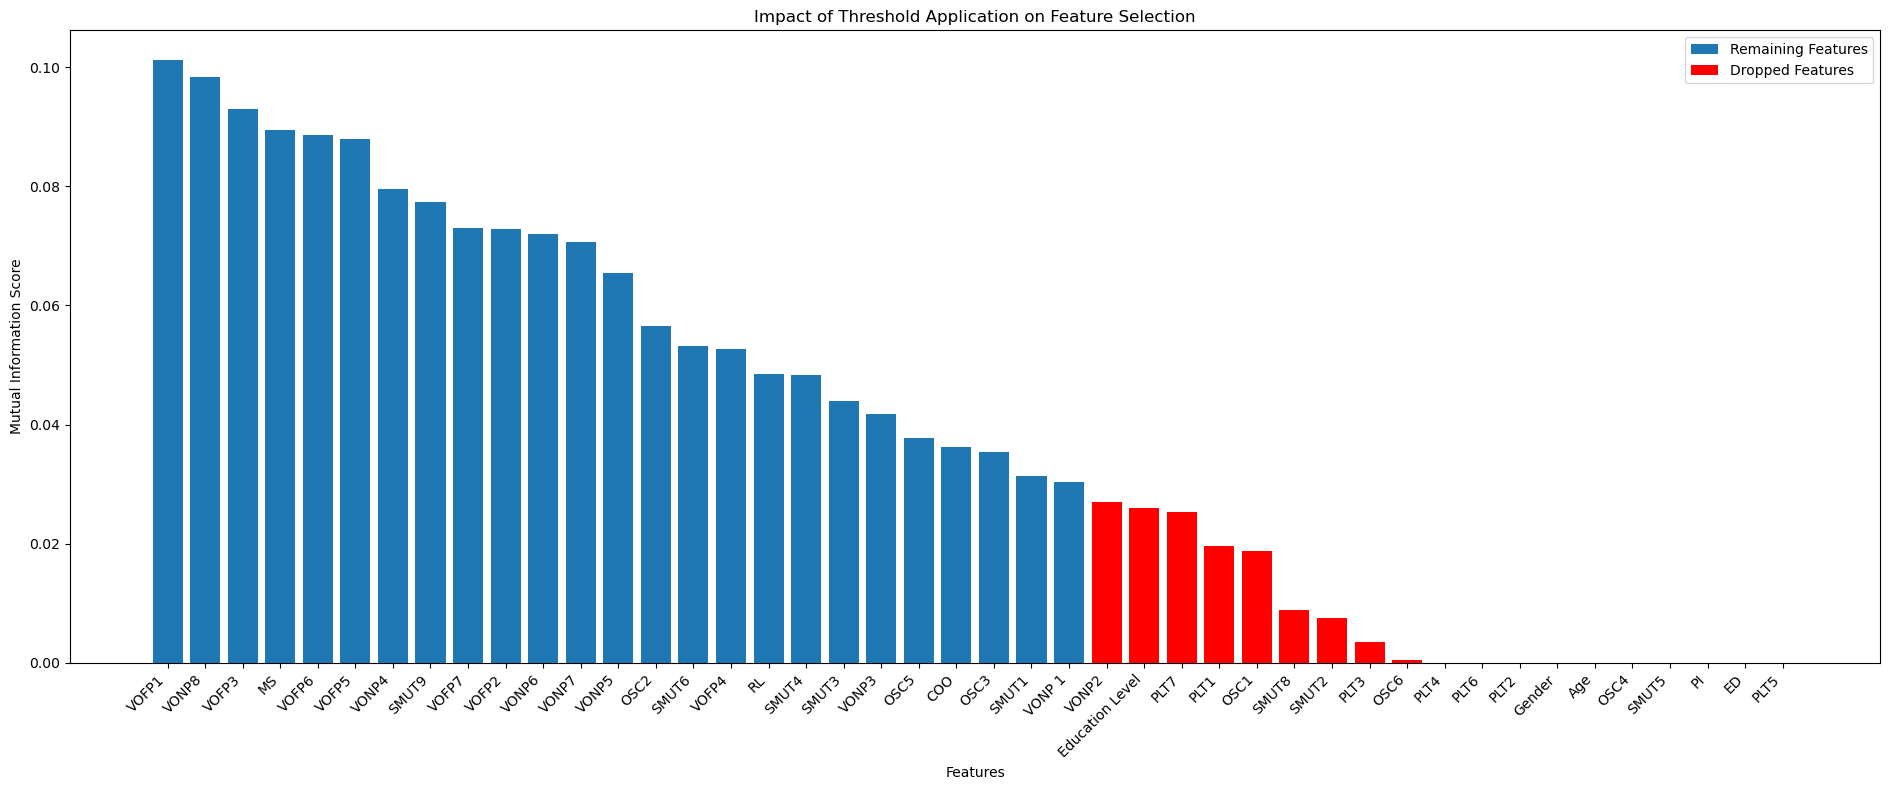

In [46]:
mutual_info = mutual_info.sort_values(ascending=False)  
threshold = 0.030  
retained_features = mutual_info[mutual_info >= threshold]
dropped_features = mutual_info[mutual_info < threshold]

plt.figure(figsize=(19, 8))
plt.bar(retained_features.index, retained_features.values, color='#1f77b4', label='Remaining Features')
plt.bar(dropped_features.index, dropped_features.values, color='red', label='Dropped Features')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Impact of Threshold Application on Feature Selection')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
X_test1.columns

Index(['SMUT1', 'SMUT3', 'SMUT4', 'SMUT6', 'SMUT9', 'OSC2', 'OSC3', 'OSC5',
       'VONP 1', 'VONP3', 'VONP4', 'VONP5', 'VONP6', 'VONP7', 'VONP8', 'VOFP1',
       'VOFP2', 'VOFP3', 'VOFP4', 'VOFP5', 'VOFP6', 'VOFP7', 'MS', 'RL',
       'COO'],
      dtype='object')

In [50]:
X_test2.columns

Index(['SMUT1', 'SMUT3', 'SMUT4', 'SMUT6', 'SMUT9', 'OSC2', 'OSC3', 'OSC5',
       'VONP 1', 'VONP3', 'VONP4', 'VONP5', 'VONP6', 'VONP7', 'VONP8', 'VOFP1',
       'VOFP2', 'VOFP3', 'VOFP4', 'VOFP5', 'VOFP6', 'VOFP7', 'MS', 'RL',
       'COO'],
      dtype='object')

### CatBoost Application

Test on Malaysian Data
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

      STRONG       0.78      0.84      0.81        62
        WEAK       0.89      0.85      0.87        97

    accuracy                           0.84       159
   macro avg       0.83      0.84      0.84       159
weighted avg       0.85      0.84      0.84       159



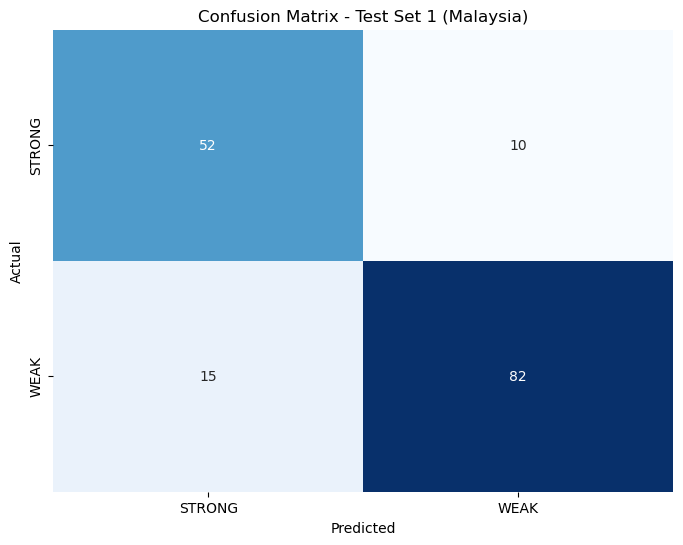

Test on Pakistan Data
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

      STRONG       0.81      0.80      0.81       101
        WEAK       0.62      0.63      0.63        52

    accuracy                           0.75       153
   macro avg       0.72      0.72      0.72       153
weighted avg       0.75      0.75      0.75       153



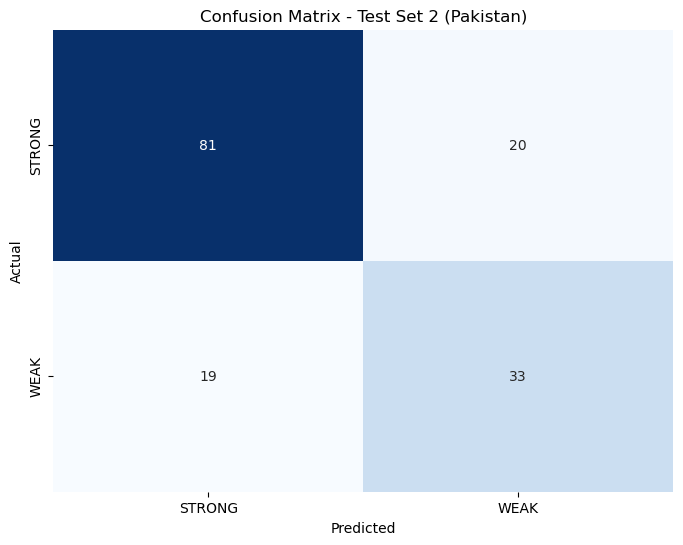

In [53]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cat_clf = CatBoostClassifier(depth= 10, iterations= 100, learning_rate= 0.1, random_state= 45, verbose=0)
cat_clf.fit(X_train, y_train)

#For Test Set 1
y_pred1 = cat_clf.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Test on Malaysian Data")
print(f"Accuracy: {accuracy1:.2f}")
print("Classification Report:")
print(classification_report(y_test1, y_pred1))

#For Test Set 1
cm1 = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=cat_clf.classes_, yticklabels=cat_clf.classes_, cbar=False)
plt.title("Confusion Matrix - Test Set 1 (Malaysia)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#For Test Set 2 
y_pred2 = cat_clf.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Test on Pakistan Data")
print(f"Accuracy: {accuracy2:.2f}")
print("Classification Report:")
print(classification_report(y_test2, y_pred2))

#For Test Set 2
cm2 = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=cat_clf.classes_, yticklabels=cat_clf.classes_, cbar=False)
plt.title("Confusion Matrix - Test Set 2 (Pakistan)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## Train on Malaysian Data to Test on The UK And Pakistan

In [56]:
#Training on Malaysian data only
X_train = X[df2['COO'] == 2]
y_train = y[df2['COO'] == 2]

#First Test set on the UK data only
X_test1 = X[df2['COO'] == 1]
y_test1 = y[df2['COO'] == 1]

#Second Test set on Pakistan data only
X_test2 = X[df2['COO'] == 3]
y_test2 = y[df2['COO'] == 3]

#Verify the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set 1 size : {X_test1.shape[0]}")
print(f"Testing set 2 size : {X_test2.shape[0]}")


Training set size: 159
Testing set 1 size : 160
Testing set 2 size : 153


## Feature Selection

### Pearson's Correlation

In [60]:
corr = X_train.corr()
corr

,SMUT1,SMUT2,SMUT3,SMUT4,SMUT5,SMUT6,SMUT7,SMUT8,SMUT9,OSC1,...,PLT6,PLT7,Gender,Age,MS,RL,PI,Education Level,ED,COO
SMUT1,1.000000,0.744358,0.643233,6.942104e-01,0.604738,0.708881,0.709372,0.637859,0.726147,0.517223,...,0.193012,6.949657e-02,0.236939,0.020348,-0.021616,0.190194,-0.275084,-0.080683,0.229386,NaN
SMUT2,0.744358,1.000000,0.866091,7.613897e-01,0.699447,0.801917,0.861875,0.522868,0.670480,0.522645,...,0.136592,1.311466e-01,0.254515,0.175793,0.102316,0.195358,-0.195698,-0.193473,0.296250,NaN
SMUT3,0.643233,0.866091,1.000000,7.601653e-01,0.681470,0.774002,0.851993,0.588777,0.662000,0.531027,...,0.119529,1.159573e-01,0.255323,0.190720,0.145195,0.220316,-0.197650,-0.181536,0.184069,NaN
SMUT4,0.694210,0.761390,0.760165,1.000000e+00,0.706440,0.820092,0.793690,0.603830,0.628025,0.504694,...,0.133910,-4.671215e-17,0.253992,0.227742,0.067809,0.130044,-0.223954,-0.130251,0.224516,NaN
SMUT5,0.604738,0.699447,0.681470,7.064398e-01,1.000000,0.719211,0.712868,0.521995,0.497876,0.547577,...,0.090509,-2.116424e-02,0.163911,0.106115,0.093807,0.192831,-0.345294,-0.080662,0.127484,NaN
SMUT6,0.708881,0.801917,0.774002,8.200915e-01,0.719211,1.000000,0.887005,0.633748,0.662493,0.511013,...,0.158556,5.312183e-02,0.215675,0.160775,0.135044,0.129033,-0.241801,-0.037460,0.165072,NaN
SMUT7,0.709372,0.861875,0.851993,7.936901e-01,0.712868,0.887005,1.000000,0.627247,0.665380,0.475162,...,0.072159,9.779407e-03,0.242343,0.162602,0.151622,0.121989,-0.202304,-0.107342,0.220475,NaN
SMUT8,0.637859,0.522868,0.588777,6.038297e-01,0.521995,0.633748,0.627247,1.000000,0.777910,0.427468,...,0.119324,-2.034470e-02,0.314628,-0.006687,0.025150,0.136439,-0.199408,-0.032510,0.075022,NaN
SMUT9,0.726147,0.670480,0.662000,6.280248e-01,0.497876,0.662493,0.665380,0.777910,1.000000,0.407836,...,0.156518,6.560853e-02,0.347644,-0.022339,0.012907,0.178763,-0.214975,-0.092907,0.214721,NaN
OSC1,0.517223,0.522645,0.531027,5.046936e-01,0.547577,0.511013,0.475162,0.427468,0.407836,1.000000,...,0.041673,8.432446e-02,0.064331,0.083631,0.081838,0.238588,-0.310865,-0.134733,0.107828,NaN


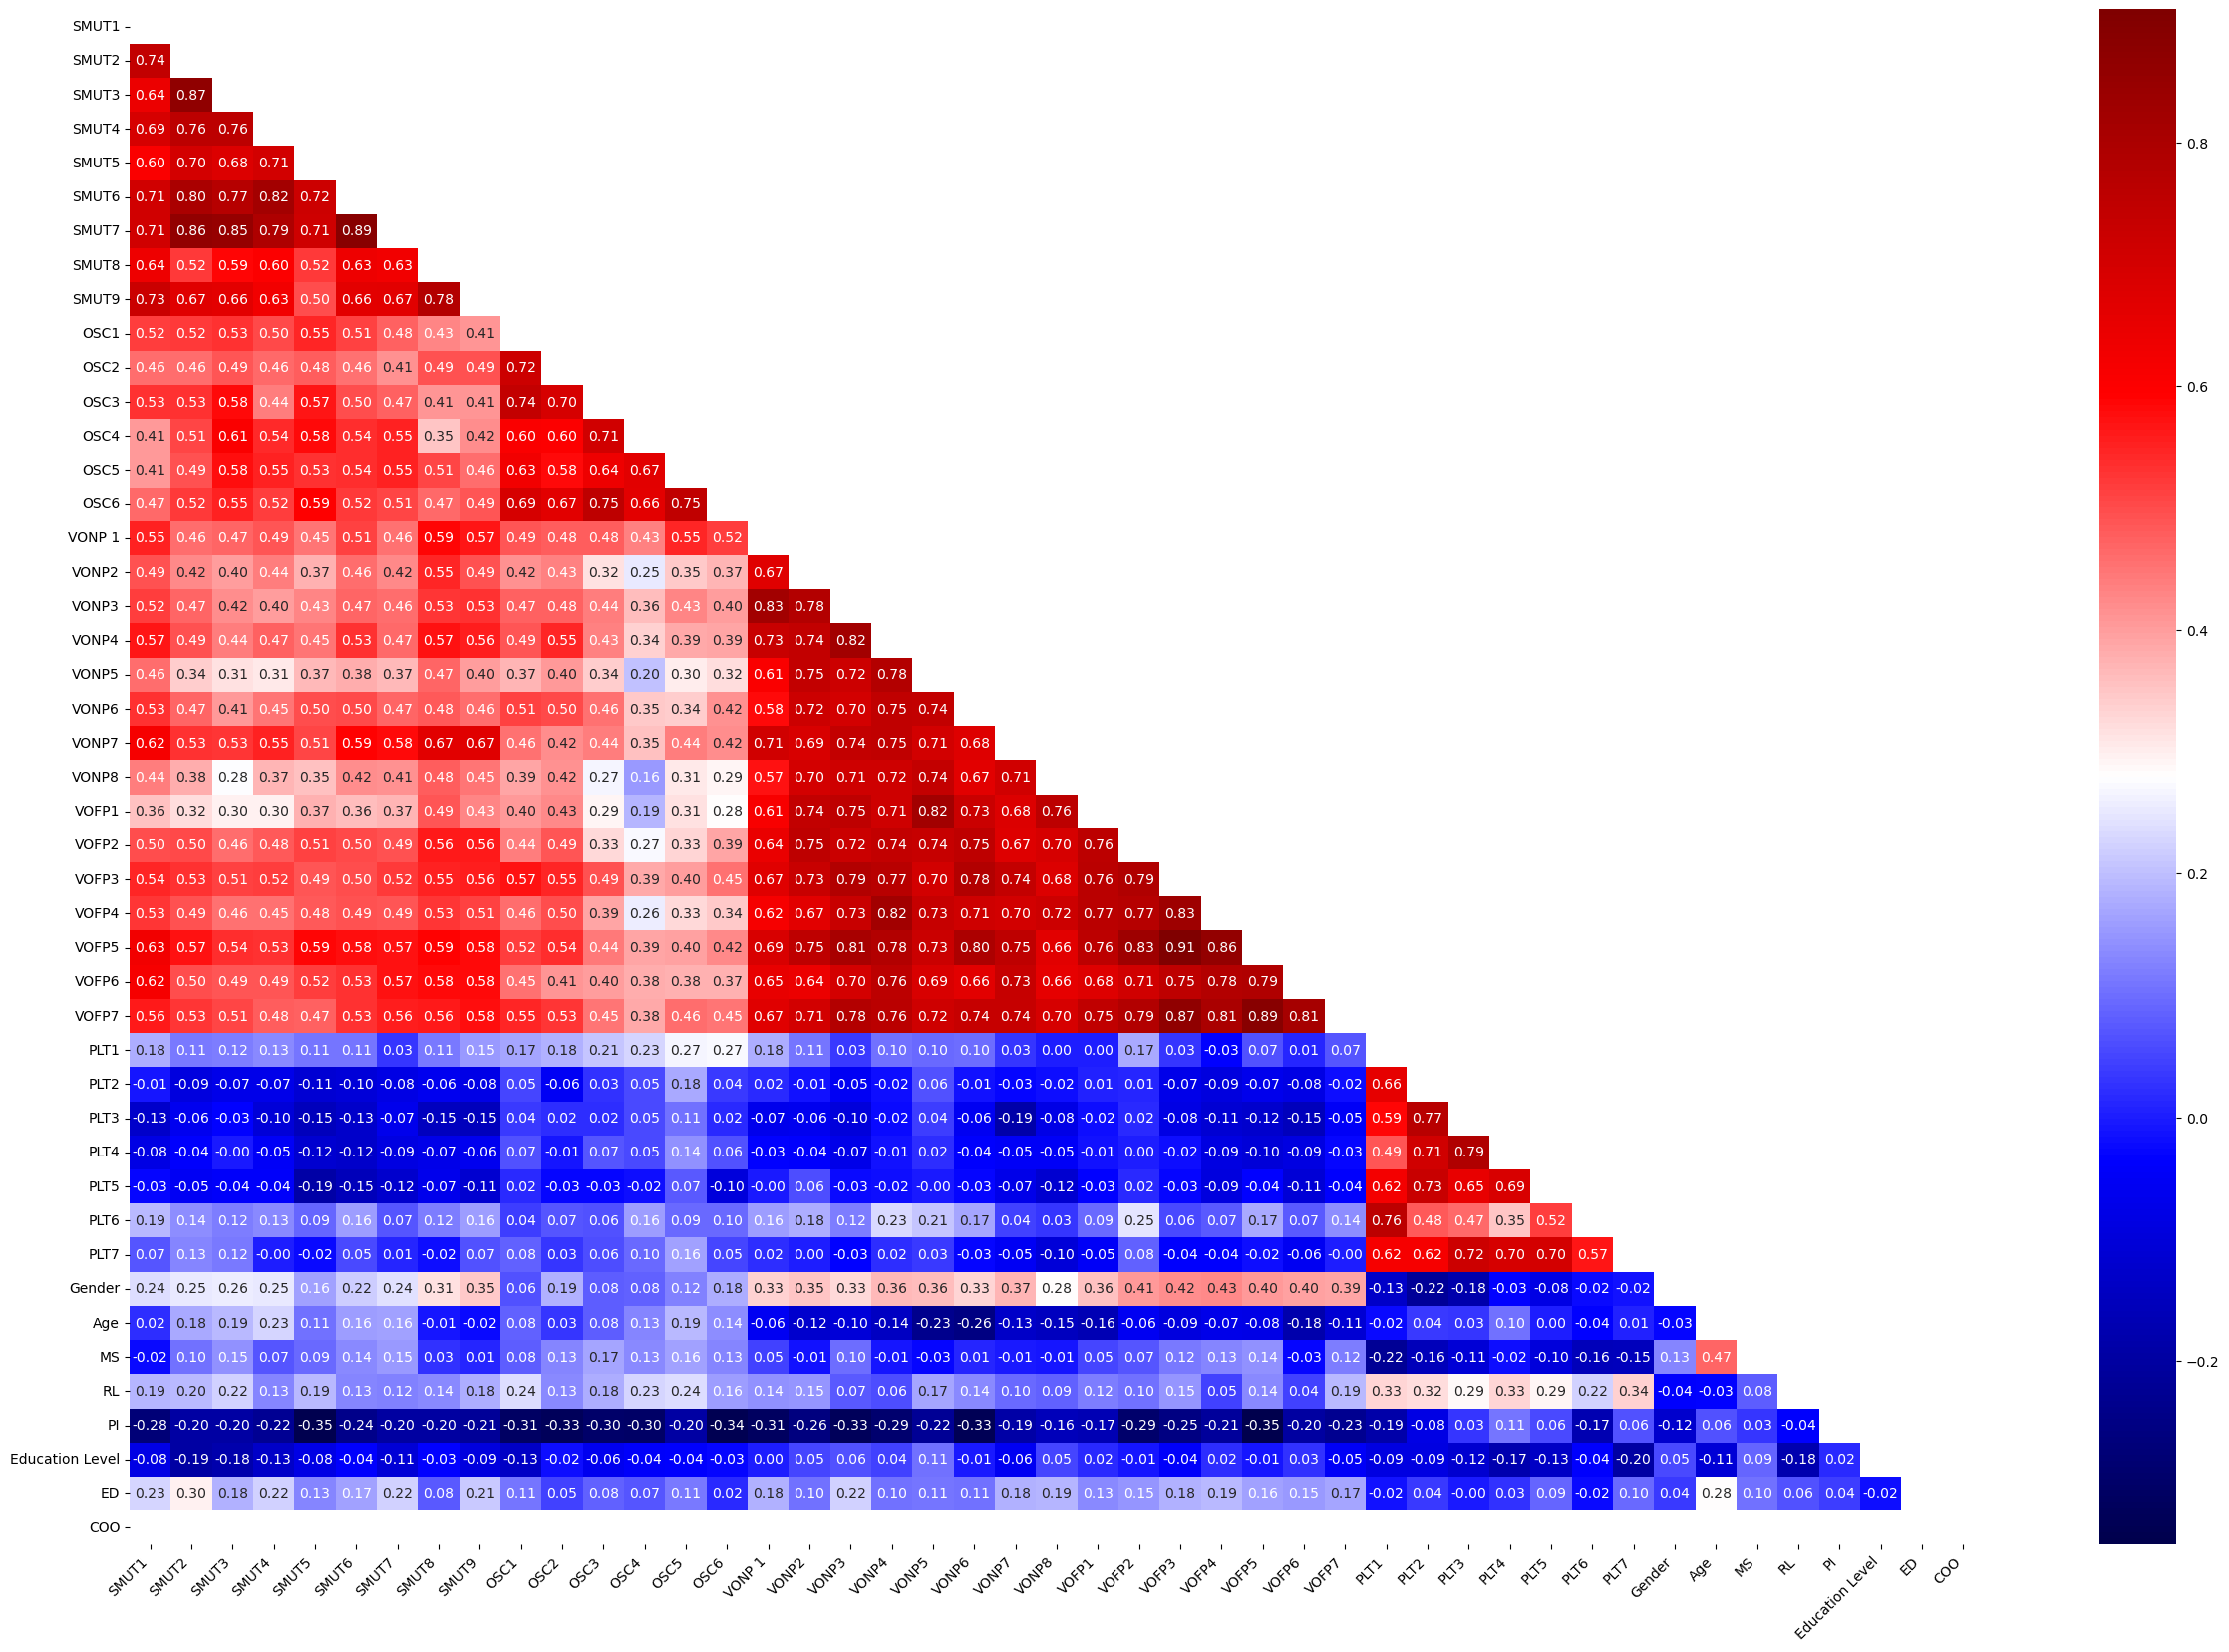

<Figure size 640x480 with 0 Axes>

In [62]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(30, 20))
sns.heatmap(
    corr, 
    mask=mask, 
    annot=True, 
    fmt=".2f", 
    cmap="seismic", 
    annot_kws={"size": 10}
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [63]:
correlation_matrix = X_train.corr()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

threshold = 0.85
corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

print(f'Number of correlated features: {len(corr_features)}')
print(corr_features)

Number of correlated features: 4
['SMUT3', 'SMUT7', 'VOFP5', 'VOFP7']


In [66]:
print(f"Number of features in X_train before dropping: {X_train.shape[1]}")
print(f"Number of features in X_test1 before dropping: {X_test1.shape[1]}")
print(f"Number of features in X_test2 before dropping: {X_test2.shape[1]}")

#Drop the correlated features from the dataset
X_train = X_train.drop(columns=corr_features, errors='ignore')
X_test1 = X_test1.drop(columns=corr_features, errors='ignore')
X_test2 = X_test2.drop(columns=corr_features, errors='ignore')

print(f"Number of features dropped: {len(corr_features)}")
print(f"Remaining features in X_train: {X_train.shape[1]}")
print(f"Remaining features in X_test1: {X_test1.shape[1]}")
print(f"Remaining features in X_test2: {X_test2.shape[1]}")

Number of features in X_train before dropping: 45
Number of features in X_test1 before dropping: 45
Number of features in X_test2 before dropping: 45
Number of features dropped: 4
Remaining features in X_train: 41
Remaining features in X_test1: 41
Remaining features in X_test2: 41


### Using Information Gain

In [69]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train, random_state = 29)
mutual_info

array([0.26478946, 0.18329044, 0.20195116, 0.14705781, 0.16239609,
       0.20103828, 0.2273136 , 0.10917235, 0.14996262, 0.0809275 ,
       0.07847804, 0.03153162, 0.09230111, 0.16608324, 0.24110885,
       0.21915622, 0.26939415, 0.24379074, 0.24497131, 0.3023129 ,
       0.21340758, 0.28743938, 0.28828431, 0.40755144, 0.33747943,
       0.33647411, 0.00587935, 0.01452645, 0.04341951, 0.0101339 ,
       0.04335428, 0.03669192, 0.01367508, 0.05804033, 0.06037829,
       0.        , 0.        , 0.0540194 , 0.06456329, 0.18672283,
       0.        ])

In [71]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

VOFP3              0.407551
VOFP4              0.337479
VOFP6              0.336474
VONP7              0.302313
VOFP2              0.288284
VOFP1              0.287439
VONP4              0.269394
SMUT1              0.264789
VONP6              0.244971
VONP5              0.243791
VONP2              0.241109
SMUT9              0.227314
VONP3              0.219156
VONP8              0.213408
SMUT4              0.201951
SMUT8              0.201038
ED                 0.186723
SMUT2              0.183290
VONP 1             0.166083
SMUT6              0.162396
OSC2               0.149963
SMUT5              0.147058
OSC1               0.109172
OSC6               0.092301
OSC3               0.080928
OSC4               0.078478
Education Level    0.064563
Age                0.060378
Gender             0.058040
PI                 0.054019
PLT3               0.043420
PLT5               0.043354
PLT6               0.036692
OSC5               0.031532
PLT2               0.014526
PLT7               0

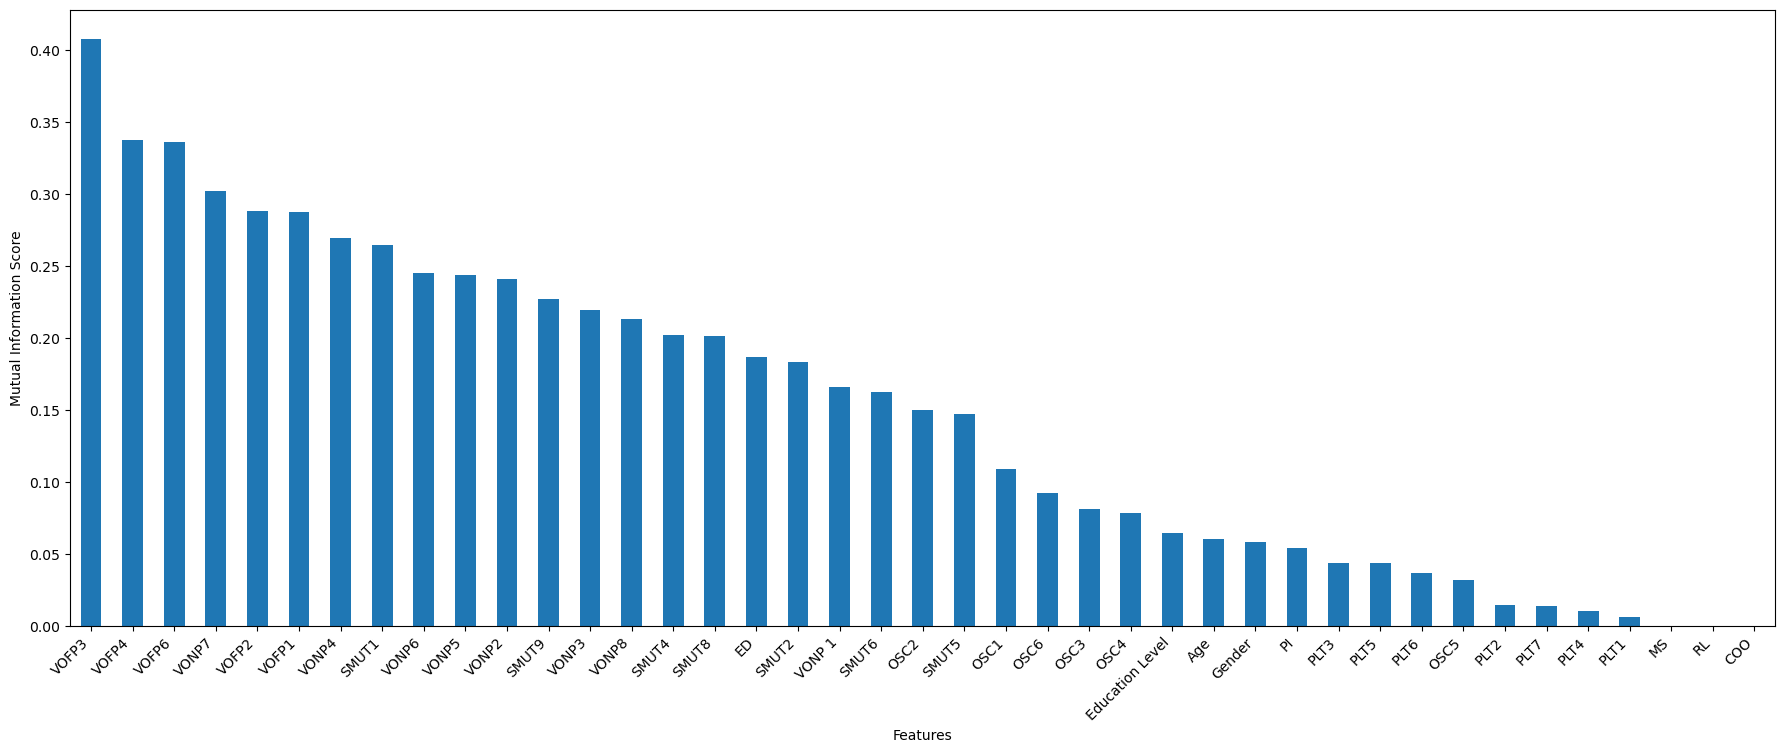

In [73]:
plt.figure(figsize = (22, 8))
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
mutual_info.sort_values(ascending = False).plot.bar()
plt.xticks(rotation=45, ha='right');

In [75]:
threshold = 0.035
features_to_drop = mutual_info[mutual_info < threshold].index

#Drop these features from the dataset
X_train = X_train.drop(columns=features_to_drop)
X_test1 = X_test1.drop(columns=features_to_drop)
X_test2 = X_test2.drop(columns=features_to_drop)

print(f"Features dropped (MI < {threshold}): {list(features_to_drop)}")
print("Remaining features after dropping:")
print(X_train.columns)

Features dropped (MI < 0.035): ['OSC5', 'PLT1', 'PLT2', 'PLT4', 'PLT7', 'MS', 'RL', 'COO']
Remaining features after dropping:
Index(['SMUT1', 'SMUT2', 'SMUT4', 'SMUT5', 'SMUT6', 'SMUT8', 'SMUT9', 'OSC1',
       'OSC2', 'OSC3', 'OSC4', 'OSC6', 'VONP 1', 'VONP2', 'VONP3', 'VONP4',
       'VONP5', 'VONP6', 'VONP7', 'VONP8', 'VOFP1', 'VOFP2', 'VOFP3', 'VOFP4',
       'VOFP6', 'PLT3', 'PLT5', 'PLT6', 'Gender', 'Age', 'PI',
       'Education Level', 'ED'],
      dtype='object')


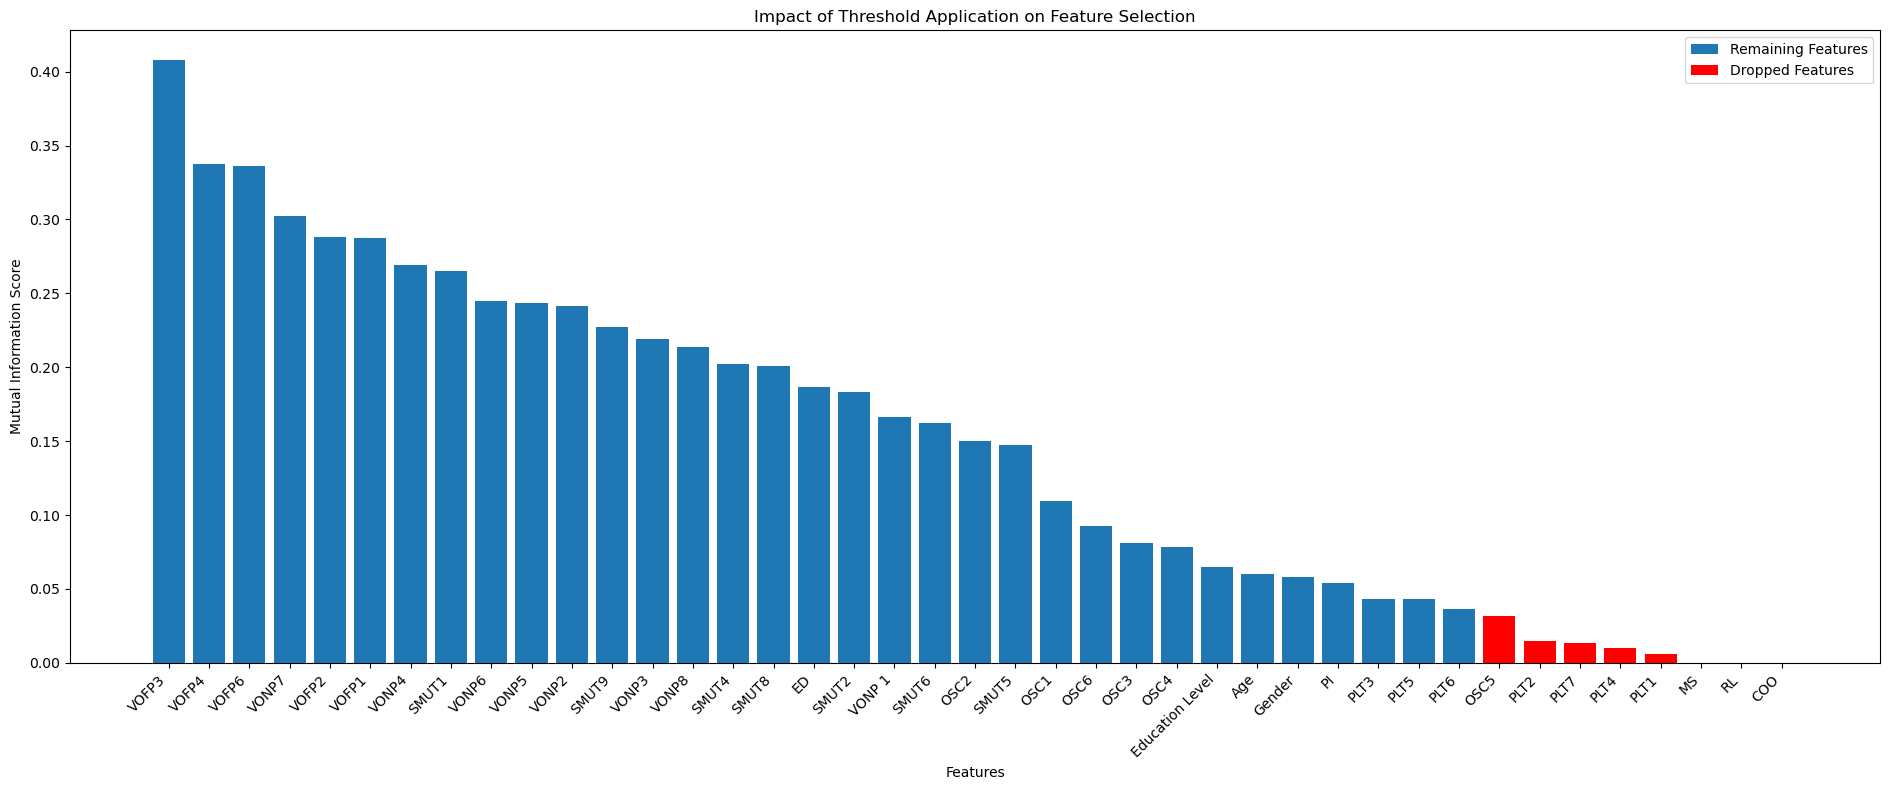

In [77]:
mutual_info = mutual_info.sort_values(ascending=False) 
threshold = 0.035  
retained_features = mutual_info[mutual_info >= threshold]
dropped_features = mutual_info[mutual_info < threshold]

plt.figure(figsize=(19, 8))
plt.bar(retained_features.index, retained_features.values, color='#1f77b4', label='Remaining Features')
plt.bar(dropped_features.index, dropped_features.values, color='red', label='Dropped Features')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Impact of Threshold Application on Feature Selection')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [79]:
X_test1.columns

Index(['SMUT1', 'SMUT2', 'SMUT4', 'SMUT5', 'SMUT6', 'SMUT8', 'SMUT9', 'OSC1',
       'OSC2', 'OSC3', 'OSC4', 'OSC6', 'VONP 1', 'VONP2', 'VONP3', 'VONP4',
       'VONP5', 'VONP6', 'VONP7', 'VONP8', 'VOFP1', 'VOFP2', 'VOFP3', 'VOFP4',
       'VOFP6', 'PLT3', 'PLT5', 'PLT6', 'Gender', 'Age', 'PI',
       'Education Level', 'ED'],
      dtype='object')

In [81]:
X_test2.columns

Index(['SMUT1', 'SMUT2', 'SMUT4', 'SMUT5', 'SMUT6', 'SMUT8', 'SMUT9', 'OSC1',
       'OSC2', 'OSC3', 'OSC4', 'OSC6', 'VONP 1', 'VONP2', 'VONP3', 'VONP4',
       'VONP5', 'VONP6', 'VONP7', 'VONP8', 'VOFP1', 'VOFP2', 'VOFP3', 'VOFP4',
       'VOFP6', 'PLT3', 'PLT5', 'PLT6', 'Gender', 'Age', 'PI',
       'Education Level', 'ED'],
      dtype='object')

## CatBoost Application

Test on The UK Data
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

      STRONG       0.82      0.92      0.87       113
        WEAK       0.73      0.51      0.60        47

    accuracy                           0.80       160
   macro avg       0.77      0.72      0.73       160
weighted avg       0.79      0.80      0.79       160



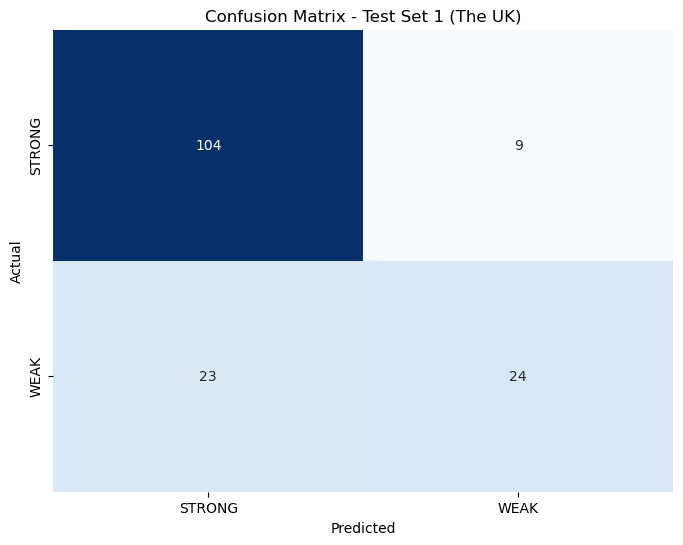

Test on Pakistan Data
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

      STRONG       0.85      0.81      0.83       101
        WEAK       0.67      0.73      0.70        52

    accuracy                           0.78       153
   macro avg       0.76      0.77      0.76       153
weighted avg       0.79      0.78      0.79       153



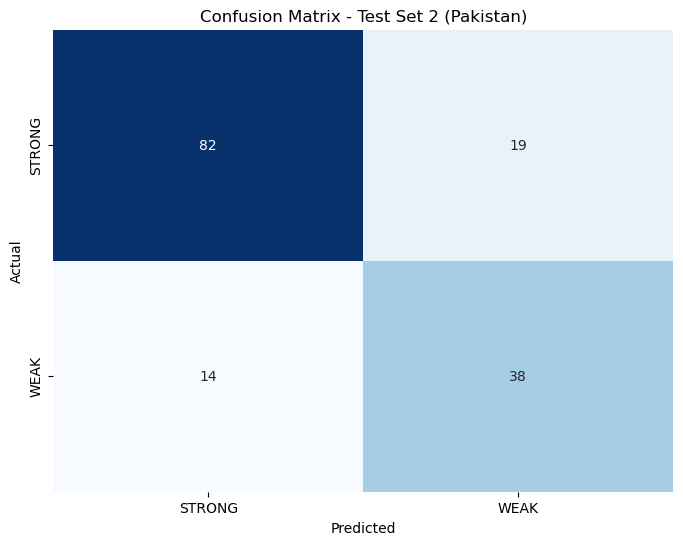

In [84]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cat_clf = CatBoostClassifier(depth= 10, iterations= 100, learning_rate= 0.1, random_state= 45, verbose=0)
cat_clf.fit(X_train, y_train)

#For Test Set 1
y_pred1 = cat_clf.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Test on The UK Data")
print(f"Accuracy: {accuracy1:.2f}")
print("Classification Report:")
print(classification_report(y_test1, y_pred1))

#For Test Set 1
cm1 = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=cat_clf.classes_, yticklabels=cat_clf.classes_, cbar=False)
plt.title("Confusion Matrix - Test Set 1 (The UK)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#For Test Set 2
y_pred2 = cat_clf.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Test on Pakistan Data")
print(f"Accuracy: {accuracy2:.2f}")
print("Classification Report:")
print(classification_report(y_test2, y_pred2))

#Foror Test Set 2
cm2 = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=cat_clf.classes_, yticklabels=cat_clf.classes_, cbar=False)
plt.title("Confusion Matrix - Test Set 2 (Pakistan)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## Train on Pakistan Data to Test on the UK And Malaysia

In [87]:
#Training on Pakistan data only
X_train = X[df2['COO'] == 3]
y_train = y[df2['COO'] == 3]

#First Test set on the UK data only
X_test1 = X[df2['COO'] == 1]
y_test1 = y[df2['COO'] == 1]

#Second Test set on Malaysian data only
X_test2 = X[df2['COO'] == 2]
y_test2 = y[df2['COO'] == 2]

#Verify the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set 1 size : {X_test1.shape[0]}")
print(f"Testing set 2 size : {X_test2.shape[0]}")

Training set size: 153
Testing set 1 size : 160
Testing set 2 size : 159


## FEATURE SELECTION

### Pearson's Correlation

In [91]:
corr = X_train.corr()
corr

,SMUT1,SMUT2,SMUT3,SMUT4,SMUT5,SMUT6,SMUT7,SMUT8,SMUT9,OSC1,...,PLT6,PLT7,Gender,Age,MS,RL,PI,Education Level,ED,COO
SMUT1,1.000000,0.423889,0.379222,0.378723,0.353869,0.477603,0.457467,0.567980,0.609343,0.360027,...,0.175228,0.157976,0.127851,0.124911,0.017895,0.083122,0.197548,0.025940,-0.085259,NaN
SMUT2,0.423889,1.000000,0.651156,0.638823,0.546524,0.444171,0.514944,0.473393,0.510230,0.455888,...,0.150507,0.145716,0.177498,0.069603,0.147617,0.052924,0.004324,0.098796,0.063422,NaN
SMUT3,0.379222,0.651156,1.000000,0.731631,0.668823,0.521315,0.480838,0.463341,0.475599,0.496827,...,0.131355,0.110009,0.092000,0.024071,0.011476,-0.048887,0.123221,-0.067527,0.120905,NaN
SMUT4,0.378723,0.638823,0.731631,1.000000,0.696341,0.593207,0.516619,0.452293,0.509004,0.424331,...,0.121937,0.050595,0.126021,0.008819,-0.051845,-0.033689,0.119035,0.017182,0.098499,NaN
SMUT5,0.353869,0.546524,0.668823,0.696341,1.000000,0.560597,0.552354,0.496620,0.531096,0.431566,...,0.188554,0.150577,0.088916,0.076434,0.093490,0.042218,0.183311,0.077508,0.044860,NaN
SMUT6,0.477603,0.444171,0.521315,0.593207,0.560597,1.000000,0.748411,0.651670,0.770384,0.440187,...,0.122991,-0.007519,0.041735,0.139564,0.032767,-0.054540,0.109396,-0.109567,-0.043985,NaN
SMUT7,0.457467,0.514944,0.480838,0.516619,0.552354,0.748411,1.000000,0.669878,0.726240,0.405407,...,0.211477,0.110179,0.086986,0.153107,0.077202,0.033541,0.145907,-0.005573,0.031931,NaN
SMUT8,0.567980,0.473393,0.463341,0.452293,0.496620,0.651670,0.669878,1.000000,0.792090,0.392857,...,0.184596,0.173662,0.097412,0.164878,0.037507,0.096230,0.176885,0.001850,-0.072362,NaN
SMUT9,0.609343,0.510230,0.475599,0.509004,0.531096,0.770384,0.726240,0.792090,1.000000,0.435723,...,0.174192,0.140110,0.124156,0.198138,0.069676,0.046691,0.181467,-0.027551,-0.048219,NaN
OSC1,0.360027,0.455888,0.496827,0.424331,0.431566,0.440187,0.405407,0.392857,0.435723,1.000000,...,0.132020,0.151101,0.048835,0.116906,0.040742,-0.016052,0.212076,-0.145166,0.148294,NaN


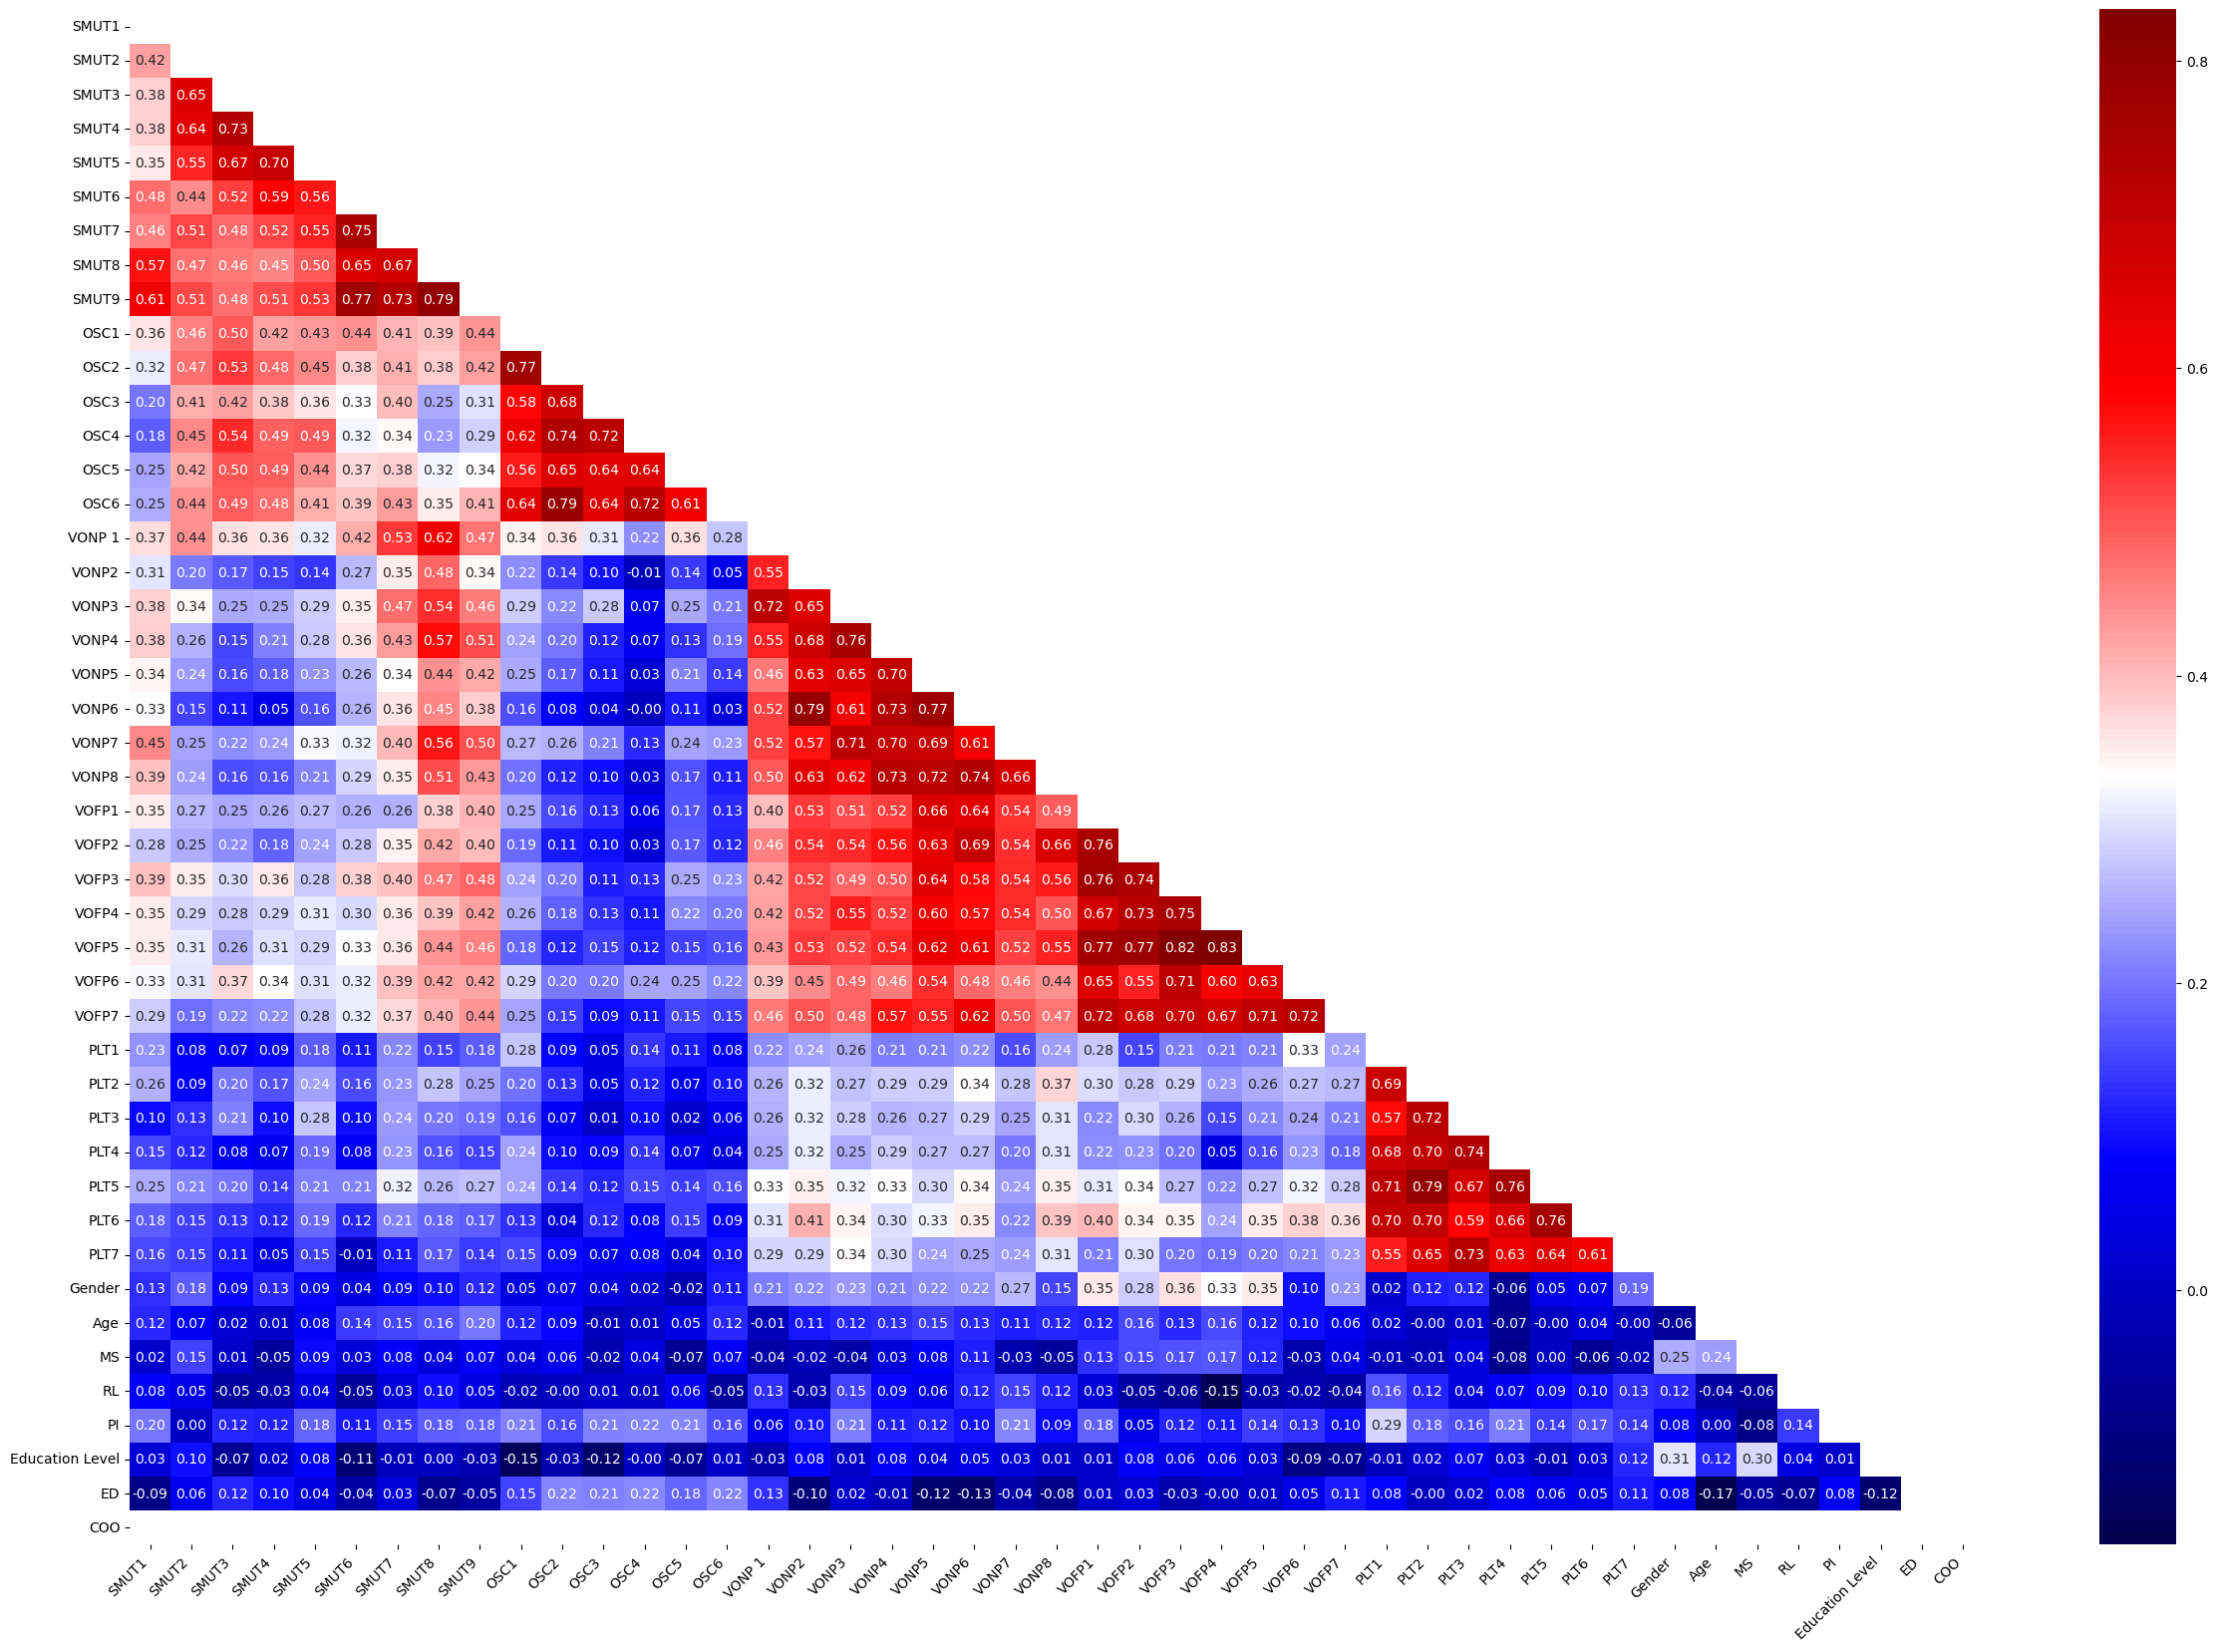

<Figure size 640x480 with 0 Axes>

In [93]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(30, 20))
sns.heatmap(
    corr, 
    mask=mask,  
    annot=True, 
    fmt=".2f", 
    cmap="seismic", 
    annot_kws={"size": 10}
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [95]:
correlation_matrix = X_train.corr()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
threshold = 0.80
corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

print(f'Number of correlated features: {len(corr_features)}')
print(corr_features)

Number of correlated features: 1
['VOFP5']


In [97]:
print(f"Number of features in X_train before dropping: {X_train.shape[1]}")
print(f"Number of features in X_test1 before dropping: {X_test1.shape[1]}")
print(f"Number of features in X_test2 before dropping: {X_test2.shape[1]}")

# Drop the correlated features from the dataset
X_train = X_train.drop(columns=corr_features, errors='ignore')
X_test1 = X_test1.drop(columns=corr_features, errors='ignore')
X_test2 = X_test2.drop(columns=corr_features, errors='ignore')

print(f"Number of features dropped: {len(corr_features)}")
print(f"Remaining features in X_train: {X_train.shape[1]}")
print(f"Remaining features in X_test1: {X_test1.shape[1]}")
print(f"Remaining features in X_test2: {X_test2.shape[1]}")

Number of features in X_train before dropping: 45
Number of features in X_test1 before dropping: 45
Number of features in X_test2 before dropping: 45
Number of features dropped: 1
Remaining features in X_train: 44
Remaining features in X_test1: 44
Remaining features in X_test2: 44


### Using Information Gain

In [100]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train, random_state = 29)
mutual_info

array([0.09705174, 0.05521362, 0.04239339, 0.08321364, 0.03357017,
       0.06306486, 0.03032218, 0.00668751, 0.11239709, 0.        ,
       0.        , 0.01124656, 0.08330402, 0.0622956 , 0.04279867,
       0.04649812, 0.04298616, 0.1028802 , 0.11861028, 0.11315024,
       0.14008702, 0.08610165, 0.08194075, 0.09492524, 0.08524682,
       0.13469556, 0.10530594, 0.11733032, 0.11715382, 0.04360517,
       0.        , 0.        , 0.00550576, 0.0592201 , 0.02819076,
       0.04946203, 0.02417341, 0.05261116, 0.        , 0.        ,
       0.00989923, 0.05677656, 0.        , 0.        ])

In [102]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

VONP6              0.140087
VOFP3              0.134696
VONP4              0.118610
VOFP6              0.117330
VOFP7              0.117154
VONP5              0.113150
SMUT9              0.112397
VOFP4              0.105306
VONP3              0.102880
SMUT1              0.097052
VOFP1              0.094925
VONP7              0.086102
VOFP2              0.085247
OSC4               0.083304
SMUT4              0.083214
VONP8              0.081941
SMUT6              0.063065
OSC5               0.062296
PLT5               0.059220
Education Level    0.056777
SMUT2              0.055214
Age                0.052611
PLT7               0.049462
VONP 1             0.046498
PLT1               0.043605
VONP2              0.042986
OSC6               0.042799
SMUT3              0.042393
SMUT5              0.033570
SMUT7              0.030322
PLT6               0.028191
Gender             0.024173
OSC3               0.011247
PI                 0.009899
SMUT8              0.006688
PLT4               0

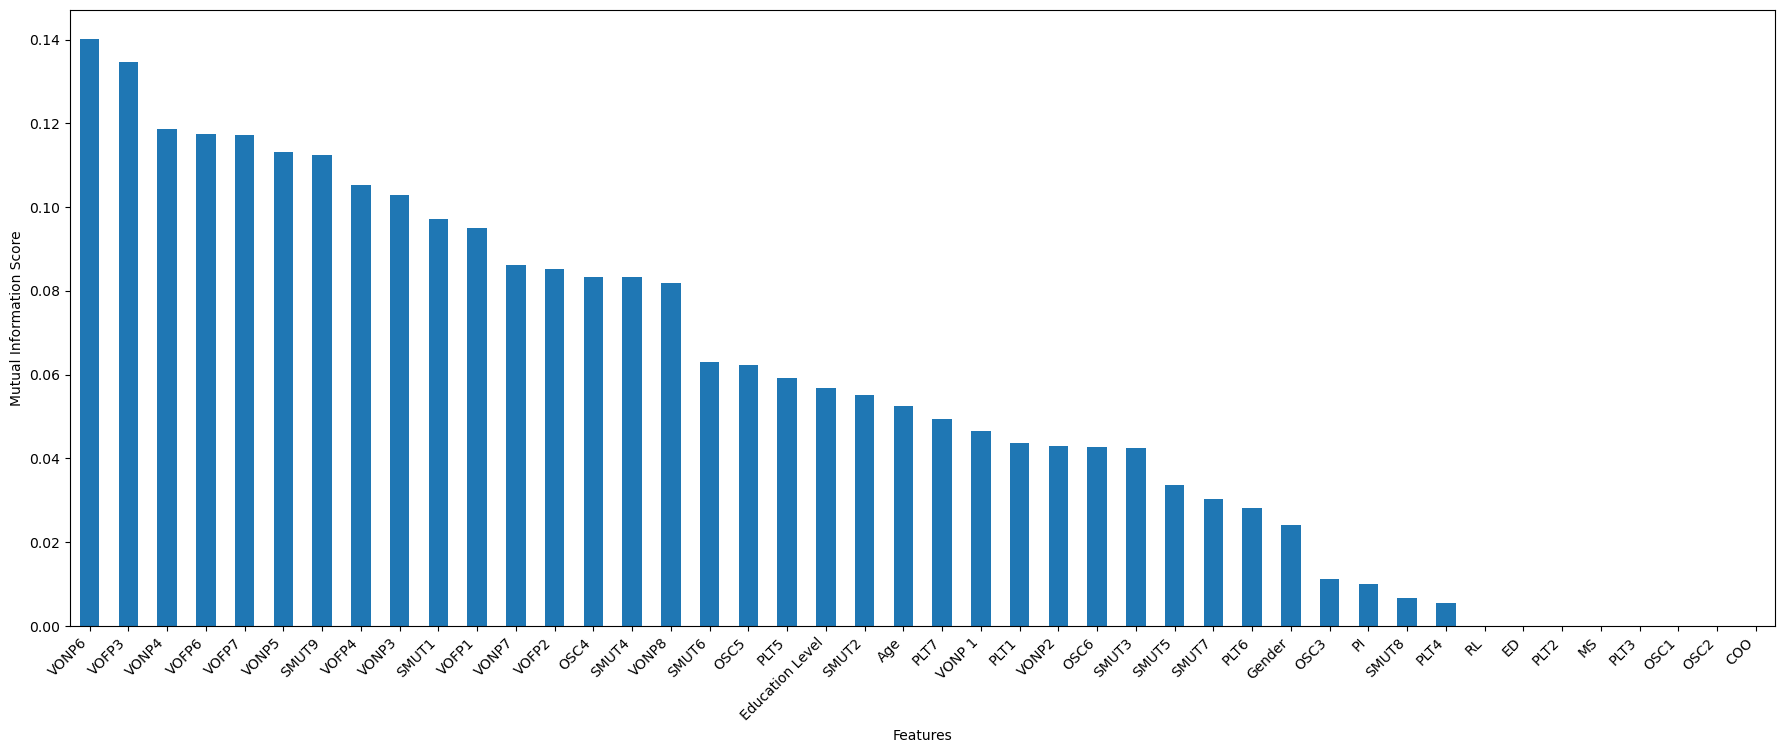

In [104]:
plt.figure(figsize = (22, 8))
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
mutual_info.sort_values(ascending = False).plot.bar()
plt.xticks(rotation=45, ha='right');

In [106]:
threshold = 0.030
features_to_drop = mutual_info[mutual_info < threshold].index

# Drop these features from the dataset
X_train = X_train.drop(columns=features_to_drop)
X_test1 = X_test1.drop(columns=features_to_drop)
X_test2 = X_test2.drop(columns=features_to_drop)

print(f"Features dropped (MI < {threshold}): {list(features_to_drop)}")
print("Remaining features after dropping:")
print(X_train.columns)

Features dropped (MI < 0.03): ['SMUT8', 'OSC1', 'OSC2', 'OSC3', 'PLT2', 'PLT3', 'PLT4', 'PLT6', 'Gender', 'MS', 'RL', 'PI', 'ED', 'COO']
Remaining features after dropping:
Index(['SMUT1', 'SMUT2', 'SMUT3', 'SMUT4', 'SMUT5', 'SMUT6', 'SMUT7', 'SMUT9',
       'OSC4', 'OSC5', 'OSC6', 'VONP 1', 'VONP2', 'VONP3', 'VONP4', 'VONP5',
       'VONP6', 'VONP7', 'VONP8', 'VOFP1', 'VOFP2', 'VOFP3', 'VOFP4', 'VOFP6',
       'VOFP7', 'PLT1', 'PLT5', 'PLT7', 'Age', 'Education Level'],
      dtype='object')


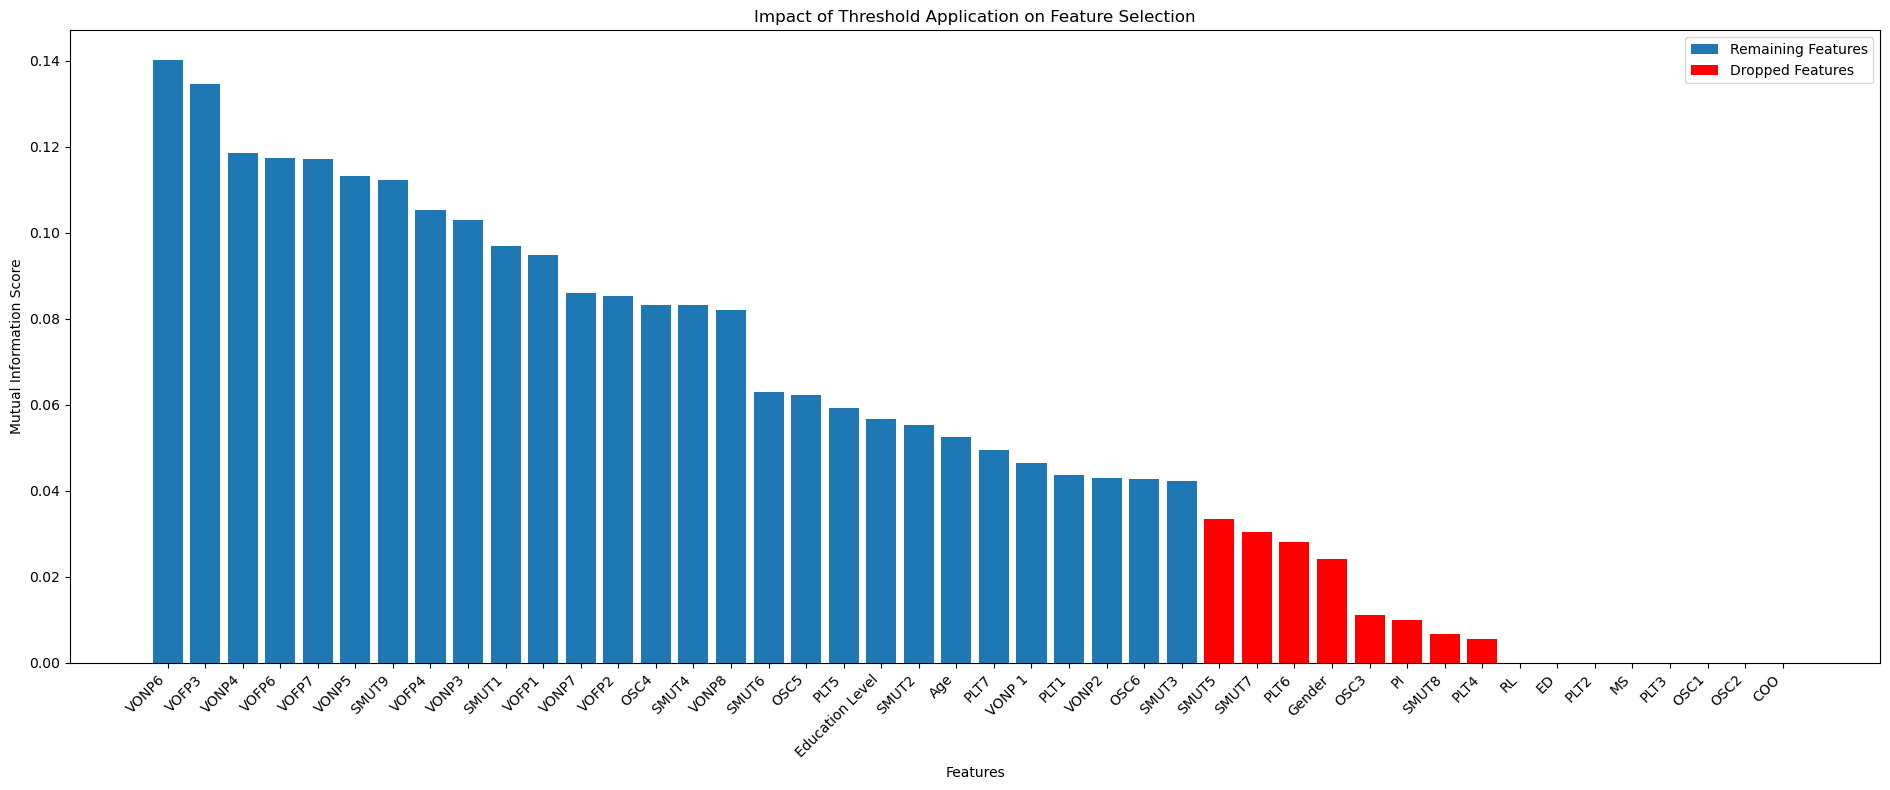

In [108]:
mutual_info = mutual_info.sort_values(ascending=False)
threshold = 0.035 
retained_features = mutual_info[mutual_info >= threshold]
dropped_features = mutual_info[mutual_info < threshold]

plt.figure(figsize=(19, 8))
plt.bar(retained_features.index, retained_features.values, color='#1f77b4', label='Remaining Features')
plt.bar(dropped_features.index, dropped_features.values, color='red', label='Dropped Features')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Impact of Threshold Application on Feature Selection')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [110]:
X_test1.columns

Index(['SMUT1', 'SMUT2', 'SMUT3', 'SMUT4', 'SMUT5', 'SMUT6', 'SMUT7', 'SMUT9',
       'OSC4', 'OSC5', 'OSC6', 'VONP 1', 'VONP2', 'VONP3', 'VONP4', 'VONP5',
       'VONP6', 'VONP7', 'VONP8', 'VOFP1', 'VOFP2', 'VOFP3', 'VOFP4', 'VOFP6',
       'VOFP7', 'PLT1', 'PLT5', 'PLT7', 'Age', 'Education Level'],
      dtype='object')

In [112]:
X_test2.columns

Index(['SMUT1', 'SMUT2', 'SMUT3', 'SMUT4', 'SMUT5', 'SMUT6', 'SMUT7', 'SMUT9',
       'OSC4', 'OSC5', 'OSC6', 'VONP 1', 'VONP2', 'VONP3', 'VONP4', 'VONP5',
       'VONP6', 'VONP7', 'VONP8', 'VOFP1', 'VOFP2', 'VOFP3', 'VOFP4', 'VOFP6',
       'VOFP7', 'PLT1', 'PLT5', 'PLT7', 'Age', 'Education Level'],
      dtype='object')

Test on The UK Data
Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

      STRONG       0.77      0.96      0.85       113
        WEAK       0.75      0.32      0.45        47

    accuracy                           0.77       160
   macro avg       0.76      0.64      0.65       160
weighted avg       0.77      0.77      0.73       160



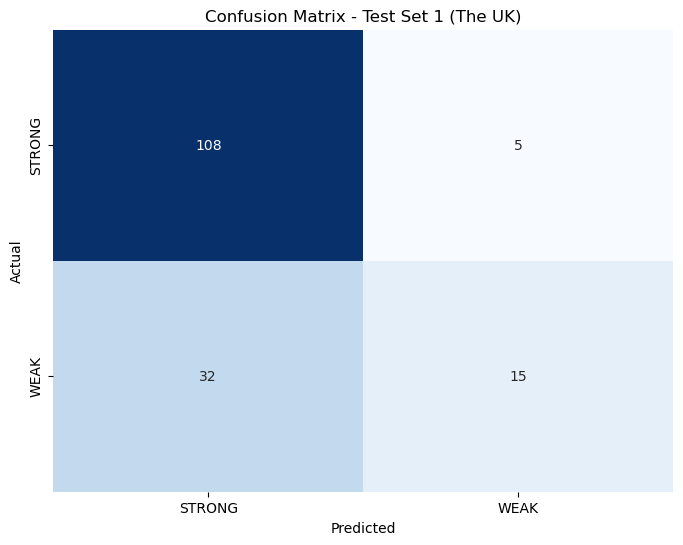

Test on Malaysian Data
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

      STRONG       0.77      0.92      0.84        62
        WEAK       0.94      0.82      0.88        97

    accuracy                           0.86       159
   macro avg       0.86      0.87      0.86       159
weighted avg       0.87      0.86      0.86       159



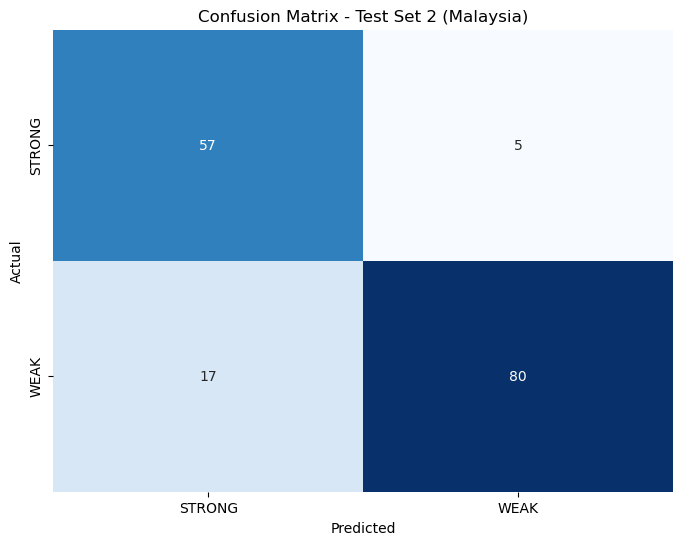

In [114]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cat_clf = CatBoostClassifier(depth= 10, iterations= 100, learning_rate= 0.1, random_state= 45, verbose=0)
cat_clf.fit(X_train, y_train)

#For Test Set 1
y_pred1 = cat_clf.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Test on The UK Data")
print(f"Accuracy: {accuracy1:.2f}")
print("Classification Report:")
print(classification_report(y_test1, y_pred1))

#For Test Set 1
cm1 = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=cat_clf.classes_, yticklabels=cat_clf.classes_, cbar=False)
plt.title("Confusion Matrix - Test Set 1 (The UK)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#For Test Set 2
y_pred2 = cat_clf.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Test on Malaysian Data")
print(f"Accuracy: {accuracy2:.2f}")
print("Classification Report:")
print(classification_report(y_test2, y_pred2))

#For Test Set 2
cm2 = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=cat_clf.classes_, yticklabels=cat_clf.classes_, cbar=False)
plt.title("Confusion Matrix - Test Set 2 (Malaysia)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()